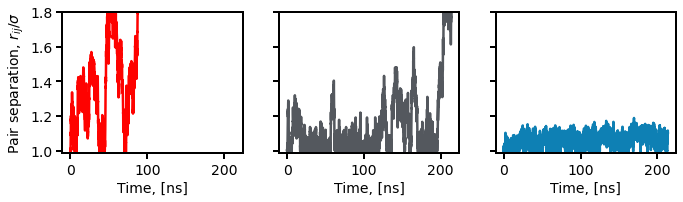

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as colors
from scipy import stats
from scipy.optimize import curve_fit

%matplotlib inline
num_to_calc = 2
duration = 99999

pair_sep_time_e0 = np.loadtxt('../FIG3A_S4B__BindingSearchEvents/pair_distance_time_e0.txt')
pair_sep_time_e25 = np.loadtxt('../FIG3A_S4B__BindingSearchEvents/pair_distance_time_e2.5.txt')
pair_sep_time_e6 = np.loadtxt('../FIG3A_S4B__BindingSearchEvents/pair_distance_time_e6.txt')
time = np.arange(0,duration+1,1)
time = time*0.00001*4*0.0000000534 # converting from LAMMPS time into s

fig, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.plot(time*1e9,pair_sep_time_e0[:,1],linewidth=2.5,color='#FE0200')
ax2.plot(time*1e9,pair_sep_time_e25[:,1],linewidth=2.5,color='#54585E')
ax3.plot(time*1e9,pair_sep_time_e6[:,0],linewidth=2.5,color='#0E80B4')

for ax in fig.get_axes():
    ax.set_xlabel('Time, [ns]',size=14)
    ax.set_ylabel('Pair separation, $r_{ij}/\sigma$',size=14)
    ax.set_ylim(0.985,1.8)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.tick_params(axis='both', which='major', labelsize=14,width=2,length=6)
    
for ax in fig.get_axes():
    ax.label_outer()
    
fig.set_size_inches(11, 2.6)
plt.savefig('./images/pair_dist_time.png', bbox_inches='tight', dpi=300)


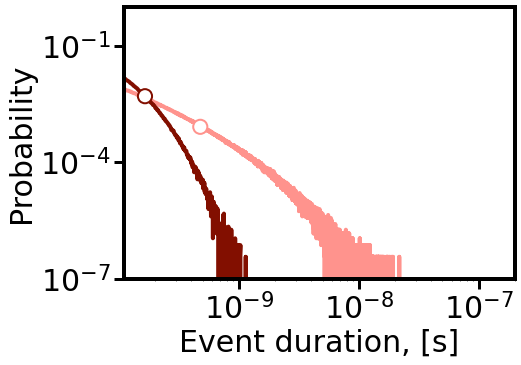

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as colors
from scipy import stats
from sklearn.neighbors import KernelDensity
from scipy.optimize import curve_fit

%matplotlib inline

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

####

search_hist_e0 = np.loadtxt('../FIG3A_S4B__BindingSearchEvents/unbindhist_e0_comb.txt')
bind_hist_e0 = np.loadtxt('../FIG3A_S4B__BindingSearchEvents/bindhist_e0_comb.txt')
bins_time = np.loadtxt('../FIG3A_S4B__BindingSearchEvents/bindunbtimebin.txt')

# see MSD for choice of diffusive (rather than inertial) regime
search_hist_e0 = search_hist_e0[50:]
bind_hist_e0 = bind_hist_e0[50:]
bins_time = bins_time[50:]

search_avg = np.sum(bins_time*search_hist_e0)/np.sum(search_hist_e0)
bind_avg = np.sum(bins_time*bind_hist_e0)/np.sum(bind_hist_e0)

####

fig, ax = plt.subplots()
pde_bind = bind_hist_e0 / (np.sum(bind_hist_e0) + np.sum(search_hist_e0))
pde_search = search_hist_e0 / (np.sum(search_hist_e0) + np.sum(bind_hist_e0))

plt.plot(bins_time, pde_search, color='#FF938D', zorder=1, linewidth=4)
plt.plot(bins_time, pde_bind, color='#820F00', zorder=2, linewidth=4)

search_avg_pdf = pde_search[find_nearest(bins_time, search_avg)]
bind_avg_pdf = pde_bind[find_nearest(bins_time, bind_avg)]
pdf_avg = np.array([search_avg_pdf,bind_avg_pdf])
bindtime_avg = np.array([search_avg,bind_avg])
plt.scatter(bindtime_avg, pdf_avg, c='w', s=200, marker='o', edgecolors=['#FF938D', '#820F00'], linewidth=2, zorder=3)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(1.1e-10,2e-7)
ax.set_ylim(1e-7,1)
ax.set_xlabel('Event duration, [s]',size=30)
ax.set_ylabel('Probability',size=30)
for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(4)
    ax.spines['right'].set_linewidth(4)
    ax.tick_params(axis='both', which='major', labelsize=30,width=3,length=10)

fig.set_size_inches(7, 5)
plt.savefig('./images/bindsearch_hist_e0_norm.png', bbox_inches='tight', dpi=300)


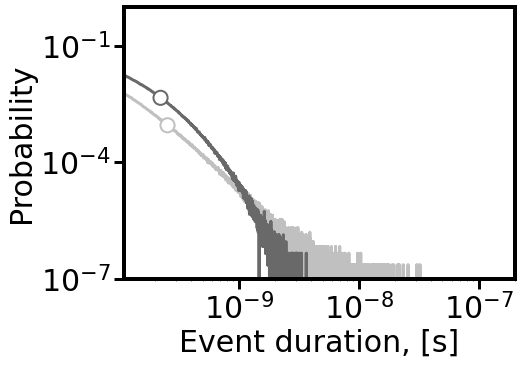

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as colors
from scipy import stats

%matplotlib inline

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

search_hist_e25 = np.loadtxt('../FIG3A_S4B__BindingSearchEvents/unbindhist_e25_comb.txt')
bind_hist_e25 = np.loadtxt('../FIG3A_S4B__BindingSearchEvents/bindhist_e25_comb.txt')
bins_time = np.loadtxt('../FIG3A_S4B__BindingSearchEvents/bindunbtimebin.txt')

search_hist_e25 = search_hist_e25[50:]
bind_hist_e25 = bind_hist_e25[50:]
bins_time = bins_time[50:]

search_avg = np.sum(bins_time*search_hist_e25)/np.sum(search_hist_e25)
bind_avg = np.sum(bins_time*bind_hist_e25)/np.sum(bind_hist_e25)

####

fig, ax = plt.subplots()
pde_bind = bind_hist_e25 / (np.sum(bind_hist_e25) + np.sum(search_hist_e25))
pde_search = search_hist_e25 / (np.sum(search_hist_e25) + np.sum(bind_hist_e25))
plt.plot(bins_time, pde_search, color='silver', zorder=2, linewidth=3)
plt.plot(bins_time, pde_bind, color='dimgrey', zorder=2, linewidth=3)

search_avg_pdf = pde_search[find_nearest(bins_time, search_avg)]
bind_avg_pdf = pde_bind[find_nearest(bins_time, bind_avg)]
pdf_avg = np.array([search_avg_pdf,bind_avg_pdf])
bindtime_avg = np.array([search_avg,bind_avg])
plt.scatter(bindtime_avg, pdf_avg, c='w', s=200, marker='o', edgecolors=['silver', 'dimgrey'], linewidth=2, zorder=3)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(1.1e-10,2e-7)
ax.set_ylim(1e-7,1)
ax.set_xlabel('Event duration, [s]',size=30)
ax.set_ylabel('Probability',size=30)
for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(4)
    ax.spines['right'].set_linewidth(4)
    ax.tick_params(axis='both', which='major', labelsize=30,width=3,length=10)

fig.set_size_inches(7, 5)
plt.savefig('./images/bindsearch_hist_e2.5_norm.png', bbox_inches='tight', dpi=300)


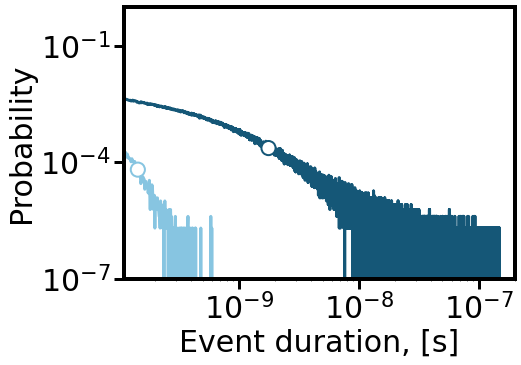

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as colors
from scipy import stats

%matplotlib inline

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

search_hist_e6 = np.loadtxt('../FIG3A_S4B__BindingSearchEvents/unbindhist_e6_comb.txt')
bind_hist_e6 = np.loadtxt('../FIG3A_S4B__BindingSearchEvents/bindhist_e6_comb.txt')
bins_time = np.loadtxt('../FIG3A_S4B__BindingSearchEvents/bindunbtimebin_e6.txt')

search_hist_e6 = search_hist_e6[50:]
bind_hist_e6 = bind_hist_e6[50:]
bins_time = bins_time[50:]
                    
search_avg = np.sum(bins_time*search_hist_e6)/np.sum(search_hist_e6)
bind_avg = np.sum(bins_time*bind_hist_e6)/np.sum(bind_hist_e6)

####

fig, ax = plt.subplots()
pde_bind = bind_hist_e6 / (np.sum(bind_hist_e6) + np.sum(search_hist_e6))
pde_search = search_hist_e6 / (np.sum(search_hist_e6) + np.sum(bind_hist_e6))
plt.plot(bins_time, pde_search, color='#87C5E1', zorder=1, linewidth=3)
plt.plot(bins_time, pde_bind, color='#155777', zorder=2, linewidth=3)

search_avg_pdf = pde_search[find_nearest(bins_time, search_avg)]
bind_avg_pdf = pde_bind[find_nearest(bins_time, bind_avg)]
pdf_avg = np.array([search_avg_pdf,bind_avg_pdf])
bindtime_avg = np.array([search_avg,bind_avg])
plt.scatter(bindtime_avg, pdf_avg, c='w', s=200, marker='o', edgecolors=['#87C5E1', '#155777'], linewidth=2, zorder=3)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(1.1e-10,2e-7)
ax.set_ylim(1e-7,1)
ax.set_xlabel('Event duration, [s]',size=30)
ax.set_ylabel('Probability',size=30)
for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(4)
    ax.spines['right'].set_linewidth(4)
    ax.tick_params(axis='both', which='major', labelsize=30,width=3,length=10)

fig.set_size_inches(7, 5)
plt.savefig('bindsearch_hist_e6_norm.png', bbox_inches='tight', dpi=300)


Sensitivity analysis below:

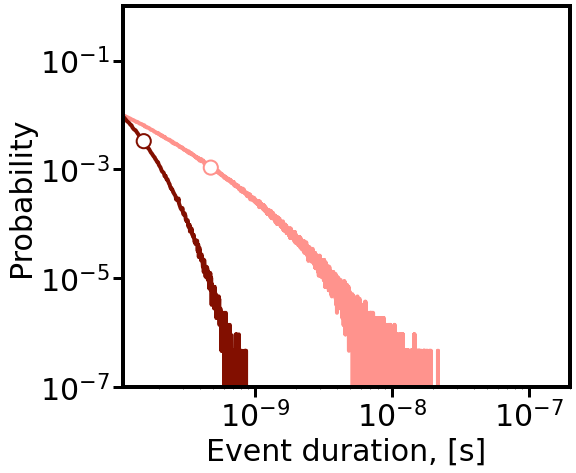

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as colors
from scipy import stats
from sklearn.neighbors import KernelDensity
from scipy.optimize import curve_fit

%matplotlib inline

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

search_hist_e0 = np.loadtxt('../FIG3A_S4B__BindingSearchEvents/unbindhist_e0_cut08.txt')
bind_hist_e0 = np.loadtxt('../FIG3A_S4B__BindingSearchEvents/bindhist_e0_cut08.txt')
bins_time = np.loadtxt('../FIG3A_S4B__BindingSearchEvents/bindunbtimebin.txt')

search_hist_e0 = search_hist_e0[50:]
bind_hist_e0 = bind_hist_e0[50:]
bins_time = bins_time[50:]

search_avg = np.sum(bins_time*search_hist_e0)/np.sum(search_hist_e0)
bind_avg = np.sum(bins_time*bind_hist_e0)/np.sum(bind_hist_e0)

####

fig, ax = plt.subplots()
pde_bind = bind_hist_e0 / (np.sum(bind_hist_e0) + np.sum(search_hist_e0))
pde_search = search_hist_e0 / (np.sum(search_hist_e0) + np.sum(bind_hist_e0))

plt.plot(bins_time, pde_search, color='#FF938D', zorder=1, linewidth=4)
plt.plot(bins_time, pde_bind, color='#820F00', zorder=2, linewidth=4)

search_avg_pdf = pde_search[find_nearest(bins_time, search_avg)]
bind_avg_pdf = pde_bind[find_nearest(bins_time, bind_avg)]
pdf_avg = np.array([search_avg_pdf,bind_avg_pdf])
bindtime_avg = np.array([search_avg,bind_avg])
plt.scatter(bindtime_avg, pdf_avg, c='w', s=200, marker='o', edgecolors=['#FF938D', '#820F00'], linewidth=2, zorder=3)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(1.1e-10,2e-7)
ax.set_ylim(1e-7,1)
ax.set_xlabel('Event duration, [s]',size=30)
ax.set_ylabel('Probability',size=30)
for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(4)
    ax.spines['right'].set_linewidth(4)
    ax.tick_params(axis='both', which='major', labelsize=30,width=3,length=10)

fig.set_size_inches(8, 7)
plt.savefig('./images/bindsearch_hist_e0_cut8_norm.png', bbox_inches='tight', dpi=300)

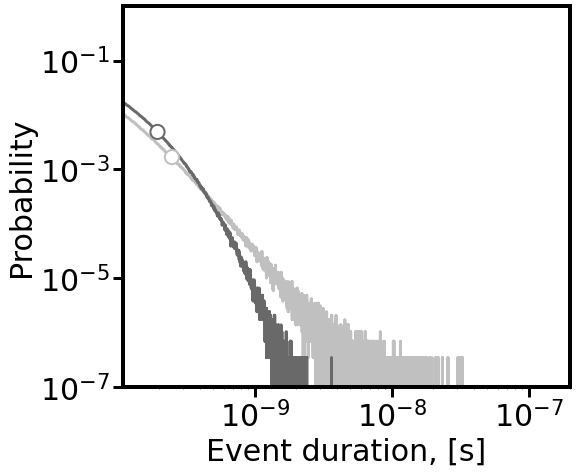

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as colors
from scipy import stats

%matplotlib inline

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

search_hist_e25 = np.loadtxt('../FIG3A_S4B__BindingSearchEvents/unbindhist_e25_cut08.txt')
bind_hist_e25 = np.loadtxt('../FIG3A_S4B__BindingSearchEvents/bindhist_e25_cut08.txt')
bins_time = np.loadtxt('../FIG3A_S4B__BindingSearchEvents/bindunbtimebin.txt')

search_hist_e25 = search_hist_e25[50:]
bind_hist_e25 = bind_hist_e25[50:]
bins_time = bins_time[50:]
                  
search_avg = np.sum(bins_time*search_hist_e25)/np.sum(search_hist_e25)
bind_avg = np.sum(bins_time*bind_hist_e25)/np.sum(bind_hist_e25)

fig, ax = plt.subplots()
pde_bind = bind_hist_e25 / (np.sum(bind_hist_e25) + np.sum(search_hist_e25))
pde_search = search_hist_e25 / (np.sum(search_hist_e25) + np.sum(bind_hist_e25))
plt.plot(bins_time, pde_search, color='silver', zorder=2, linewidth=3)
plt.plot(bins_time, pde_bind, color='dimgrey', zorder=2, linewidth=3)

search_avg_pdf = pde_search[find_nearest(bins_time, search_avg)]
bind_avg_pdf = pde_bind[find_nearest(bins_time, bind_avg)]
pdf_avg = np.array([search_avg_pdf,bind_avg_pdf])
bindtime_avg = np.array([search_avg,bind_avg])
plt.scatter(bindtime_avg, pdf_avg, c='w', s=200, marker='o', edgecolors=['silver', 'dimgrey'], linewidth=2, zorder=3)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(1.1e-10,2e-7)
ax.set_ylim(1e-7,1)
ax.set_xlabel('Event duration, [s]',size=30)
ax.set_ylabel('Probability',size=30)
for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(4)
    ax.spines['right'].set_linewidth(4)
    ax.tick_params(axis='both', which='major', labelsize=30,width=3,length=10)

fig.set_size_inches(8, 7)
plt.savefig('./images/bindsearch_hist_e2.5_cut8_norm.png', bbox_inches='tight', dpi=300)


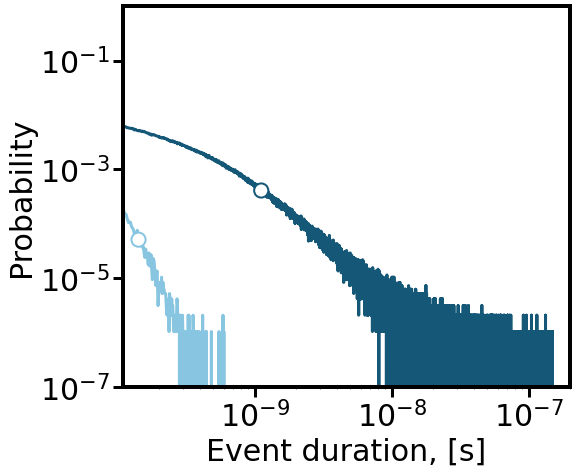

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as colors
from scipy import stats

%matplotlib inline

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

search_hist_e6 = np.loadtxt('../FIG3A_S4B__BindingSearchEvents/unbindhist_e6_cut08.txt')
bind_hist_e6 = np.loadtxt('../FIG3A_S4B__BindingSearchEvents/bindhist_e6_cut08.txt')
bins_time = np.loadtxt('../FIG3A_S4B__BindingSearchEvents/bindunbtimebin_e6.txt')

search_hist_e6 = search_hist_e6[50:]
bind_hist_e6 = bind_hist_e6[50:]
bins_time = bins_time[50:]
            
search_avg = np.sum(bins_time*search_hist_e6)/np.sum(search_hist_e6)
bind_avg = np.sum(bins_time*bind_hist_e6)/np.sum(bind_hist_e6)

fig, ax = plt.subplots()
pde_bind = bind_hist_e6 / (np.sum(bind_hist_e6) + np.sum(search_hist_e6))
pde_search = search_hist_e6 / (np.sum(search_hist_e6) + np.sum(bind_hist_e6))
plt.plot(bins_time, pde_search, color='#87C5E1', zorder=1, linewidth=3)
plt.plot(bins_time, pde_bind, color='#155777', zorder=2, linewidth=3)

search_avg_pdf = pde_search[find_nearest(bins_time, search_avg)]
bind_avg_pdf = pde_bind[find_nearest(bins_time, bind_avg)]
pdf_avg = np.array([search_avg_pdf,bind_avg_pdf])
bindtime_avg = np.array([search_avg,bind_avg])
plt.scatter(bindtime_avg, pdf_avg, c='w', s=200, marker='o', edgecolors=['#87C5E1', '#155777'], linewidth=2, zorder=3)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(1.1e-10,2e-7)
ax.set_ylim(1e-7,1)
ax.set_xlabel('Event duration, [s]',size=30)
ax.set_ylabel('Probability',size=30)
for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(4)
    ax.spines['right'].set_linewidth(4)
    ax.tick_params(axis='both', which='major', labelsize=30,width=3,length=10)
         
fig.set_size_inches(8, 7)
plt.savefig('./images/bindsearch_hist_e6_cut8_norm.png', bbox_inches='tight', dpi=300)


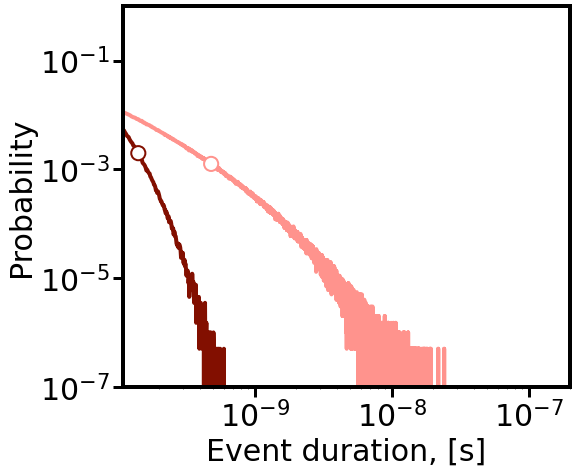

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as colors
from scipy import stats
from sklearn.neighbors import KernelDensity
from scipy.optimize import curve_fit

%matplotlib inline

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

search_hist_e0 = np.loadtxt('../FIG3A_S4B__BindingSearchEvents/unbindhist_e0_cut05.txt')
bind_hist_e0 = np.loadtxt('../FIG3A_S4B__BindingSearchEvents/bindhist_e0_cut05.txt')
bins_time = np.loadtxt('../FIG3A_S4B__BindingSearchEvents/bindunbtimebin.txt')

search_hist_e0 = search_hist_e0[50:]
bind_hist_e0 = bind_hist_e0[50:]
bins_time = bins_time[50:]

search_avg = np.sum(bins_time*search_hist_e0)/np.sum(search_hist_e0)
bind_avg = np.sum(bins_time*bind_hist_e0)/np.sum(bind_hist_e0)

####

fig, ax = plt.subplots()
pde_bind = bind_hist_e0 / (np.sum(bind_hist_e0) + np.sum(search_hist_e0))
pde_search = search_hist_e0 / (np.sum(search_hist_e0) + np.sum(bind_hist_e0))

plt.plot(bins_time, pde_search, color='#FF938D', zorder=1, linewidth=4)
plt.plot(bins_time, pde_bind, color='#820F00', zorder=2, linewidth=4)

search_avg_pdf = pde_search[find_nearest(bins_time, search_avg)]
bind_avg_pdf = pde_bind[find_nearest(bins_time, bind_avg)]
pdf_avg = np.array([search_avg_pdf,bind_avg_pdf])
bindtime_avg = np.array([search_avg,bind_avg])
plt.scatter(bindtime_avg, pdf_avg, c='w', s=200, marker='o', edgecolors=['#FF938D', '#820F00'], linewidth=2, zorder=3)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(1.1e-10,2e-7)
ax.set_ylim(1e-7,1)
ax.set_xlabel('Event duration, [s]',size=30)
ax.set_ylabel('Probability',size=30)
for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(4)
    ax.spines['right'].set_linewidth(4)
    ax.tick_params(axis='both', which='major', labelsize=30,width=3,length=10)

fig.set_size_inches(8, 7)
plt.savefig('./images/bindsearch_hist_e0_cut5_norm.png', bbox_inches='tight', dpi=300)

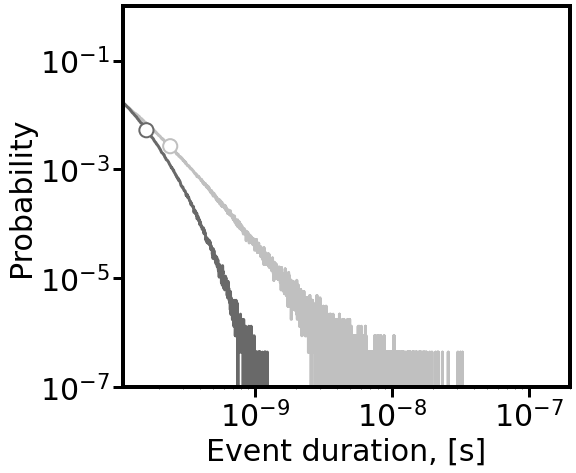

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as colors
from scipy import stats

%matplotlib inline

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

search_hist_e25 = np.loadtxt('../FIG3A_S4B__BindingSearchEvents/unbindhist_e25_cut05.txt')
bind_hist_e25 = np.loadtxt('../FIG3A_S4B__BindingSearchEvents/bindhist_e25_cut05.txt')
bins_time = np.loadtxt('../FIG3A_S4B__BindingSearchEvents/bindunbtimebin.txt')

search_hist_e25 = search_hist_e25[50:]
bind_hist_e25 = bind_hist_e25[50:]
bins_time = bins_time[50:]
                   
search_avg = np.sum(bins_time*search_hist_e25)/np.sum(search_hist_e25)
bind_avg = np.sum(bins_time*bind_hist_e25)/np.sum(bind_hist_e25)

fig, ax = plt.subplots()
pde_bind = bind_hist_e25 / (np.sum(bind_hist_e25) + np.sum(search_hist_e25))
pde_search = search_hist_e25 / (np.sum(search_hist_e25) + np.sum(bind_hist_e25))
plt.plot(bins_time, pde_search, color='silver', zorder=2, linewidth=3)
plt.plot(bins_time, pde_bind, color='dimgrey', zorder=2, linewidth=3)

search_avg_pdf = pde_search[find_nearest(bins_time, search_avg)]
bind_avg_pdf = pde_bind[find_nearest(bins_time, bind_avg)]
pdf_avg = np.array([search_avg_pdf,bind_avg_pdf])
bindtime_avg = np.array([search_avg,bind_avg])
plt.scatter(bindtime_avg, pdf_avg, c='w', s=200, marker='o', edgecolors=['silver', 'dimgrey'], linewidth=2, zorder=3)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(1.1e-10,2e-7)
ax.set_ylim(1e-7,1)
ax.set_xlabel('Event duration, [s]',size=30)
ax.set_ylabel('Probability',size=30)
for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(4)
    ax.spines['right'].set_linewidth(4)
    ax.tick_params(axis='both', which='major', labelsize=30,width=3,length=10)
        
fig.set_size_inches(8, 7)
plt.savefig('./images/bindsearch_hist_e2.5_cut5_norm.png', bbox_inches='tight', dpi=300)


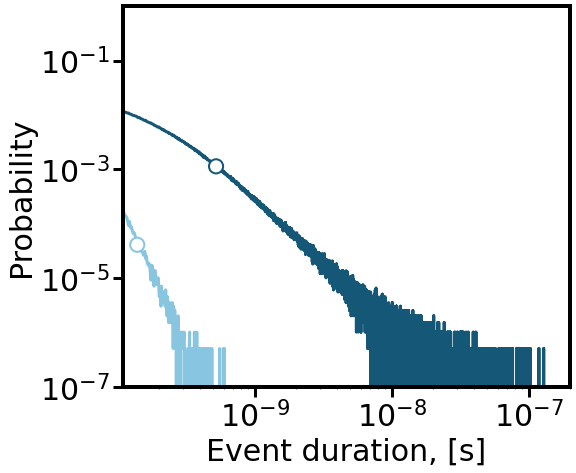

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as colors
from scipy import stats

%matplotlib inline

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

search_hist_e6 = np.loadtxt('../FIG3A_S4B__BindingSearchEvents/unbindhist_e6_cut05.txt')
bind_hist_e6 = np.loadtxt('../FIG3A_S4B__BindingSearchEvents/bindhist_e6_cut05.txt')
bins_time = np.loadtxt('../FIG3A_S4B__BindingSearchEvents/bindunbtimebin_e6.txt')

search_hist_e6 = search_hist_e6[50:]
bind_hist_e6 = bind_hist_e6[50:]
bins_time = bins_time[50:]
                  
search_avg = np.sum(bins_time*search_hist_e6)/np.sum(search_hist_e6)
bind_avg = np.sum(bins_time*bind_hist_e6)/np.sum(bind_hist_e6)

fig, ax = plt.subplots()
pde_bind = bind_hist_e6 / (np.sum(bind_hist_e6) + np.sum(search_hist_e6))
pde_search = search_hist_e6 / (np.sum(search_hist_e6) + np.sum(bind_hist_e6))
plt.plot(bins_time, pde_search, color='#87C5E1', zorder=1, linewidth=3)
plt.plot(bins_time, pde_bind, color='#155777', zorder=2, linewidth=3)

search_avg_pdf = pde_search[find_nearest(bins_time, search_avg)]
bind_avg_pdf = pde_bind[find_nearest(bins_time, bind_avg)]
pdf_avg = np.array([search_avg_pdf,bind_avg_pdf])
bindtime_avg = np.array([search_avg,bind_avg])
plt.scatter(bindtime_avg, pdf_avg, c='w', s=200, marker='o', edgecolors=['#87C5E1', '#155777'], linewidth=2, zorder=3)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(1.1e-10,2e-7)
ax.set_ylim(1e-7,1)
ax.set_xlabel('Event duration, [s]',size=30)
ax.set_ylabel('Probability',size=30)
for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(4)
    ax.spines['right'].set_linewidth(4)
    ax.tick_params(axis='both', which='major', labelsize=30,width=3,length=10)
       
fig.set_size_inches(8, 7)
plt.savefig('./images/bindsearch_hist_e6_cut5_norm.png', bbox_inches='tight', dpi=300)
